# Redes Neurais

In [221]:
# Usa as entradas, cada um com seus pesos, para definir o valor da função soma.
# soma = somatório[xi*wi] -> Entradas * pesos
# Sempre função soma definindo o resultado da função de ativação
# Para a função do tipo step function, se a soma >= 1, resultado é 1. Se não, é 0
# O objetivo do algoritmo é achar os melhores pesos.

In [222]:
# Uma forma de atualizar os pesos é peso(n+1) = peso(n) + (taxaAprendizagem*entrada*erro)

### REDES MULTICAMADA (MULTILAYER PERCEPTRON)

É quando há camadas ocultas de novos neurônios.

Todas as entradas irão atingir as camadas ocultas.

Todas as camadas ocultas irão atingir o neurônio final onde está a função soma final.

De início, os pesos são definidos de forma aleatória.

In [223]:
# função sigmoide retorna valor aprox 1 para x alto e 0 para x pequeno.
# sigmoide é usada em casos mais complexos em que a step não funciona bem.
# sigmoide é a função de ativação no caso abaixo


![Não deu certo](redes.jpg)


O algoritmo deve ser chamado várias vezes para ir otimizando os pesos e assim melhorar o resultado da função de ativação final.

O gradiente vai dizer a direção que o peso deve ser mudado. Ajuda a descobrir como diminuir o erro.

![](gradiente.jpg)

In [224]:
# y = 1 / (1 + e^x)
# d = y*(y-1) -> derivada sigmoide

# DeltaSaída = Erro * DerivadaSigmoide -> Fazer isso para cada combinação de entradas.

# Depois disso, é preciso achar DeltaEscondida para cada camada oculta.
# DeltaEscondida = DerivadaSigmoide * peso * DeltaSaída


![](delta.jpg)

### Usando o algoritmo Backpropagation

Primeiro calcula da esquerda para a direita, depois da direita para a esquerda.

Definir o valor de entrada*delta. Depois usar isso na fórmula do novo peso.



![](calculodelta.jpg)

Agora fazendo da esquerda para a direita.

Se uma camada recebe vários valores diferentes de uma mesma porta de entrada, todas essas combinações devem ser levadas em conta no cálculo de entrada*delta para um mesmo neurônio.

![](del.jpg)

![](d.jpg)

Agora é repetir o processo mais vezes para os pesos serem otimizados.

Unidade BIAS: novos neurônios que são add às camadas oculta e final. Vem por padrão nos algoritmos

MEAN SQUARED ERROR (MSE) penaliza mais os erros e ajuda a rede a melhorar os pesos - MSE = 1/N Somatorio (saida - sigmoide)^2

Batch gradiente descent - Calcula o erro para todos os registros e atualiza os preços.

Stochastic gradient descent - Calcula o erro para cada registro e atualiza os pesos. Ajuda a evitar os mínimos locais. É mais rápido.

Mini batch gradiente descent - Definir com quantos registros os pesos serão atualizados.

taxa de aprendizagem - taxa que o algoritmo vai atualizar os pesos. Normalmente 0.001

Existem muitas outras funções de ativação

In [225]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Entrada -> Camadas ocultas -> Camada saída
from tensorflow.keras.layers import Dense # Um neurônio de uma camada está ligado a todos os neurônios da próxima camada
#from keras.utils import np_utils
from tensorflow.keras.datasets import mnist # importando uma base de dados de dígitos

In [226]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, 'Classe: 9')

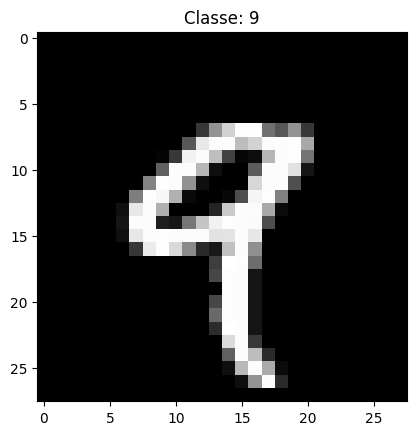

In [227]:
plt.imshow(X_treinamento[4].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(y_treinamento[4]))

In [228]:
X_treinamento, y_treinamento

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [229]:
X_treinamento.shape # 60000 imagens de 784 pixels

# Serão 784 entradas na rede neural

(60000, 28, 28)

In [230]:
X_treinamento = X_treinamento.reshape(60000, 28 * 28)
X_treinamento.shape

(60000, 784)

In [231]:
X_treinamento[1] # 0 é preto e 255 é branco

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [232]:
X_teste = X_teste.reshape(10000, 28 * 28)
X_teste.shape

(10000, 784)

In [233]:
y_treinamento, y_teste

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### PRÉ-PROCESSAMENTO DAS IMAGENS

NORMALIZANDO A ESCALA DE VALORES PARA 0 ATÉ 1

In [234]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [235]:
X_treinamento[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [236]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [237]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [238]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [239]:
# Sigmoide - 0 e 1 (2 classes)
# Softmax serve quando são 3 ou mais classes. Irá devolver as probabilidades de ser de uma determinada classe.

In [240]:
y_treinamento = tensorflow.keras.utils.to_categorical(y_treinamento)
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [241]:
y_treinamento[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [242]:
y_teste = tensorflow.keras.utils.to_categorical(y_teste)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Arquitetura e treinamento da rede neural

In [243]:
(784 + 10) / 2

397.0

In [244]:
# 784 -> 397 -> 397 -> 10
rede_neural = Sequential() # Criando a rede neural
rede_neural.add(Dense(input_shape = (784, ), units = 397, activation = 'relu')) # função relu é usada para as camadas escondidas
# relu vale x para x > 0 e 0 para x <= 0
rede_neural.add(Dense(units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 10, activation = 'softmax'))

c:\Users\tdw07\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [245]:
# adam é uma melhoria do método da descida do gradiente
# loss está indicando o método de calcular o erro analisando a entropia
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [246]:
# 128 é com quantos registros os pesos serão atualizados
historico = rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 50)
# a accuracy abaixo não é importante porque se trata apenas do treinamento ainda

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8802 - loss: 0.4224
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9731 - loss: 0.0872
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9844 - loss: 0.0542
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9890 - loss: 0.0355
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9914 - loss: 0.0265
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9927 - loss: 0.0222
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0165
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9963 - loss: 0.0121
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9961 - loss: 0.0108
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9962 - loss: 0.0120
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

### AVALIAÇÃO

In [247]:
historico.history.keys()

# A loss é uma medida de quão bem o modelo está performando em cada passo do treinamento.
# Ela representa a discrepância entre as saídas previstas pelo modelo e as saídas reais (rótulos) dos dados de treinamento.

# accuracy calculada como a proporção de previsões corretas em relação ao número total de amostras.
# A accuracy é uma métrica de desempenho, mas não é usada diretamente no processo de otimização do modelo.

# a loss é uma medida interna usada durante o treinamento para otimizar os parâmetros do modelo, 
# enquanto a accuracy é uma medida externa usada para avaliar o desempenho geral do modelo em dados de teste.

dict_keys(['accuracy', 'loss'])

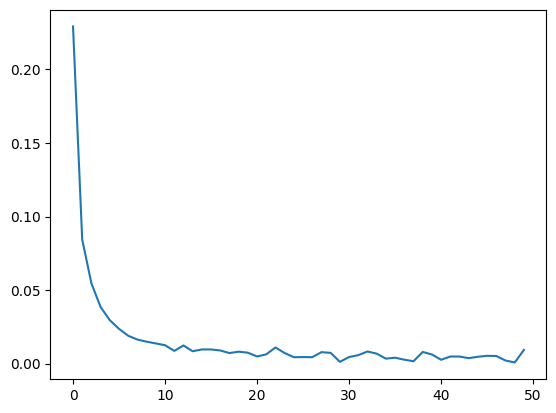

In [248]:
plt.plot(historico.history['loss'])

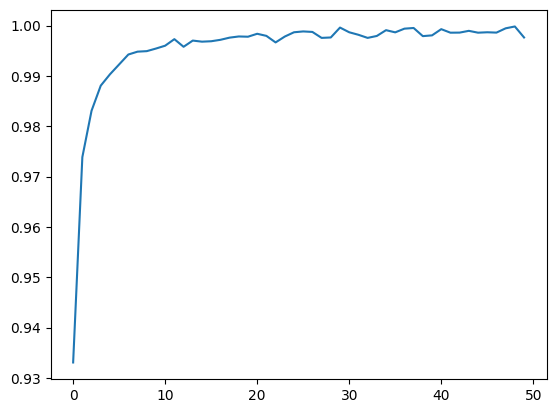

In [249]:
plt.plot(historico.history['accuracy'])

In [250]:
X_teste, X_teste.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (10000, 784))

In [251]:
rede_neural.evaluate(X_teste, y_teste) # Primeira forma de avaliar erro e accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.1538


[0.12489800900220871, 0.9833999872207642]

In [252]:
previsoes = rede_neural.predict(X_teste) # Outra forma de avaliar o algoritmo agora vendo as probabilidades de cada uma das 10 saídas
previsoes, previsoes.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(array([[2.8682093e-23, 1.0446870e-21, 6.4415643e-20, ..., 1.0000000e+00,
         2.6100491e-24, 4.4289139e-17],
        [1.3313110e-21, 6.0142766e-15, 1.0000000e+00, ..., 9.3168934e-18,
         4.0047595e-19, 1.5081939e-28],
        [1.7621959e-19, 1.0000000e+00, 7.7989447e-17, ..., 1.1487126e-14,
         7.8755517e-14, 1.2957472e-21],
        ...,
        [3.5833401e-29, 1.2065077e-28, 2.1769167e-28, ..., 5.4307225e-26,
         1.1058275e-22, 4.2996901e-28],
        [1.5007852e-27, 0.0000000e+00, 9.8519341e-35, ..., 1.8947030e-28,
         4.6523876e-22, 5.4462115e-29],
        [1.8680734e-32, 2.9335195e-37, 0.0000000e+00, ..., 0.0000000e+00,
         2.3448818e-28, 9.3920532e-31]], dtype=float32),
 (10000, 10))

In [253]:
previsoes[0]

array([2.8682093e-23, 1.0446870e-21, 6.4415643e-20, 2.9098411e-18,
       1.3355449e-26, 5.8178499e-27, 7.1440181e-28, 1.0000000e+00,
       2.6100491e-24, 4.4289139e-17], dtype=float32)

Text(0.5, 1.0, 'Classe: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]')

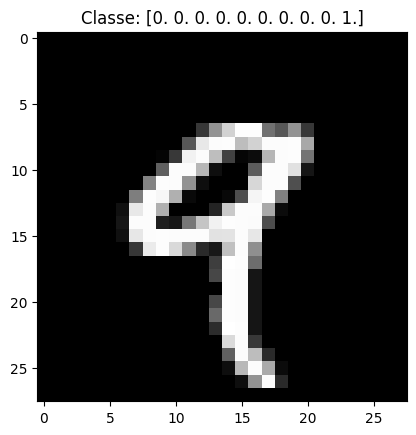

In [254]:
plt.imshow(X_treinamento[4].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(y_treinamento[4]))

### CLASSIFICAÇÃO DE UMA ÚNICA IMAGEM

In [255]:
import cv2


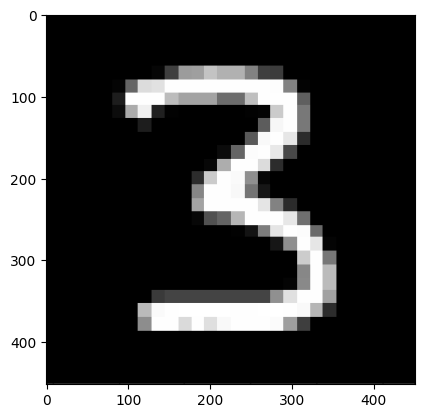

In [256]:
# Carregando a imagem
imagem_teste = cv2.imread('digito.png')

# Convertendo a imagem de BGR para RGB (matplotlib usa RGB)
imagem_rgb = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB)

# Exibindo a imagem usando matplotlib
plt.imshow(imagem_rgb)


In [257]:
imagem_rgb.shape # Shapenão está 28 x 28. É preciso resolver isso

(452, 451, 3)

In [258]:
imagem_rgb = cv2.resize(imagem_rgb, (28, 28))
imagem_rgb.shape
# 3 indica os canais de cores. Isso pode ser removido

(28, 28, 3)

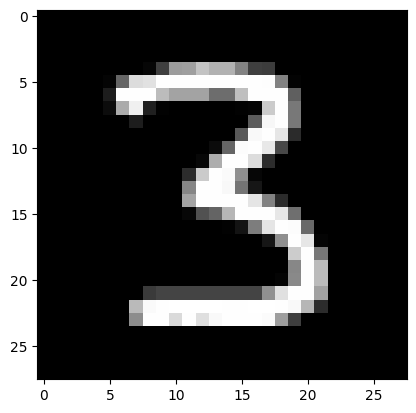

In [259]:
plt.imshow(imagem_rgb)

In [260]:
imagem_rgb = cv2.cvtColor(imagem_rgb, cv2.COLOR_BGR2GRAY)
imagem_rgb.shape

(28, 28)

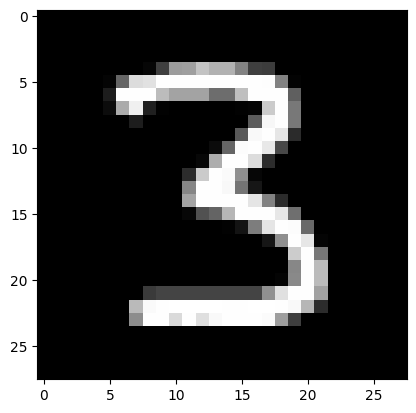

In [261]:
plt.imshow(imagem_rgb, cmap='gray')

In [262]:
imagem_rgb = imagem_rgb.reshape(1, 28 * 28)
imagem_rgb.shape

(1, 784)

In [263]:
imagem_rgb

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   6,  63, 156, 159, 195, 177, 177, 130,  63,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4, 101, 220, 225, 254, 254, 254, 254, 254, 254, 254,
        254, 253, 130,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  29, 254, 254, 254, 188

In [264]:
imagem_rgb = imagem_rgb / 255
imagem_rgb

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [265]:
previsao = rede_neural.predict(imagem_rgb)
previsao

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.0000000e+00, 1.2990381e-29, 1.6170393e-26, 1.0000000e+00,
        3.3717377e-36, 1.2885215e-28, 0.0000000e+00, 1.0930959e-27,
        1.3879929e-21, 2.4593152e-31]], dtype=float32)

In [266]:
import numpy as np
np.argmax(previsao)

# Nota-se que o algoritmo acertou

3